<a href="https://colab.research.google.com/github/Clement-Okolo/NeuralNetworks/blob/main/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Experiments

We implemented the linear regression model concisely by using high-level APIs of deep learning frameworks.


In [ ]:
!pip install d2l==1.0.3

import random
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from d2l import torch as d2l

### Define the Model

In [2]:
class LinearRegression(d2l.Module):
    """The linear regression model implemented with high-level APIs."""
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.LazyLinear(1) # specifies output to be 1-dimensional
        self.net.weight.data.normal_(0, 0.01) # initialize weights drawing random numbers from a normal distribution with mean 0 and standard deviation 0.01
        self.net.bias.data.fill_(0)

In [3]:
# invoke the built-in `__call__` method of the predefined layers to compute the outputs using the forward method
@d2l.add_to_class(LinearRegression)
def forward(self, X):
    return self.net(X)

### Defining the Loss Function


In [4]:
# compute mean squared error
@d2l.add_to_class(LinearRegression)
def loss(self, y_hat, y):
    fn = nn.MSELoss()
    return fn(y_hat, y)

### Defining the Optimization Algorithm


In [5]:
# Implement Minibatch SDG
@d2l.add_to_class(LinearRegression)
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), self.lr) # specifies the parameters to optimize over and the learning rate

# [1.] Experiment with changing the learning rate parameter and the amount of training needed to reach convergence. Display the results of the changes in a notebook so that you can compare them. Add a text cell to the notebook that tries to interpret the any differences that you find.


## Training (Original Model with lr = 0.03 and max_epochs=3)


 The class SyntheticRegressionData generates data points that obey a linear trend with Gaussian noise added.

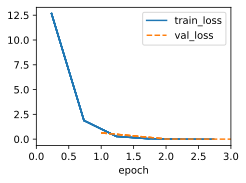

In [6]:
model = LinearRegression(lr=0.03) # specify learning rate
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2) # generate dataset using specified parameters
trainer = d2l.Trainer(max_epochs=3) # specify amount training
trainer.fit(model, data)

### Compare the Model Parameters Learned by Training on Finite data and the Actual Parameters that Generated our Dataset

In [7]:
@d2l.add_to_class(LinearRegression)
def get_w_b(self):
    return (self.net.weight.data, self.net.bias.data)
w, b = model.get_w_b() # access model parameters

In [8]:
# compute the difference between model parameters and actual parameter
print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - b}')

error in estimating w: tensor([ 0.0053, -0.0096])
error in estimating b: tensor([0.0122])


## Training (lr = 0.003 and max_epochs=15)

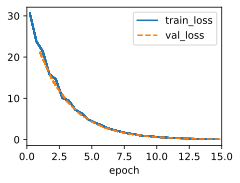

In [9]:
model = LinearRegression(lr=0.003) # specify learning rate
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2) # generate dataset using specified parameters
trainer = d2l.Trainer(max_epochs=15) # specify amount training
trainer.fit(model, data)

In [10]:
@d2l.add_to_class(LinearRegression)
def get_w_b(self):
    return (self.net.weight.data, self.net.bias.data)
w, b = model.get_w_b() # access model parameters

In [11]:
# compute the difference between model parameters and actual parameter
print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - b}')

error in estimating w: tensor([ 0.0592, -0.2066])
error in estimating b: tensor([0.2014])


### Interpretation of Result for lr = 0.003 and max_epochs=15:

Here, we decrease the original learning rate from 0.03 to 0.003 and increased the original max_epoch from 3 to 15. Overall, both the training loss and validation loss decrease over time, and coverged at about 6 epoch. This means that the smaller the learning rate the more the amount of training needed to reach convergence.

## Training (lr = 0.3 and max_epochs=2)

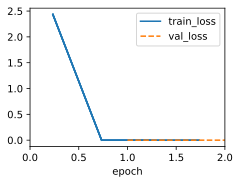

In [12]:
model = LinearRegression(lr=0.3) # specify learning rate
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2) # generate dataset using specified parameters
trainer = d2l.Trainer(max_epochs=2) # specify amount training
trainer.fit(model, data)

In [13]:
@d2l.add_to_class(LinearRegression)
def get_w_b(self):
    return (self.net.weight.data, self.net.bias.data)
w, b = model.get_w_b() # access model parameters

In [14]:
# compute the difference between model parameters and actual parameter
print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - b}')

error in estimating w: tensor([ 0.0047, -0.0013])
error in estimating b: tensor([-0.0008])


# Interpretation of Result for lr = 0.03 and max_epochs=2:
Here, we increased the epoch from 0.03 to 0.3 and decreased the max_epoch from 3 to 2. We observed they converged at about 1 epoch. This further empahasized the fact that the higher the learning rate, the lesser the amount of trainings needed to converge.

# [2.] Figure out how to add outliers to the dataset to see what happens when Gaussian assumptions are violated. With this information, you can create two separate datasets. One has purely Gaussian noise and the other has outliers mixed with the Gaussian noise. Randomly sample from the generated datasets and create a scatter plot for each dataset, so that you can see what the qualitative properties of the data look like. Add a text cell to the notebook to explain the differences in the plots.


### Extend the Functionality of the class SyntheticRegressionData



In [15]:
class SyntheticRegressionData(d2l.DataModule):
    """Synthetic data for linear regression."""
    def __init__(self, w, b , noise=0.01, num_train=1000, num_val=1000,
                 batch_size=32):
        super().__init__()
        self.save_hyperparameters()
        self.num_train = num_train
        self.num_val = num_val
        self.batch_size = batch_size
        self.n = num_train + num_val
        self.X = torch.randn(self.n, len(w))
        noise = torch.randn(self.n, 1) * noise
        self.y = torch.matmul(self.X, w.reshape((-1, 1))) + b + noise

    """Add copy method to class"""
    def copy(self):
        # Create a new instance with the same parameters
        new_instance = SyntheticRegressionData(w=self.hparams['w'], b=self.hparams['b'],
                                               noise=self.hparams['noise'], num_train=self.num_train,
                                               num_val=self.num_val, batch_size=self.batch_size)
        # Manually copy over the data to ensure a deep copy
        new_instance.X = self.X.clone()
        new_instance.y = self.y.clone()
        return new_instance

"""Generate the first Dataset with Purely Gaussian Noise"""
data1 = SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)

@d2l.add_to_class(d2l.DataModule)
def get_tensorloader(self, tensors, train, indices=slice(0, None)):
    tensors = tuple(a[indices] for a in tensors)
    dataset = torch.utils.data.TensorDataset(*tensors)
    return torch.utils.data.DataLoader(dataset, self.batch_size,
                                       shuffle=train)

@d2l.add_to_class(SyntheticRegressionData)
def get_dataloader(self, train):
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader((self.X, self.y), train, i)

X1, y1 = next(iter(data1.train_dataloader()))
print('X1 shape:', X1.shape, '\ny1 shape:', y1.shape)

"""Generate the Second Dataset with Outliers Missed with Gaussian Noise"""
# Create a deep copy
data2 = data1.copy()

# Add outliers to the copied dataset
outlier_magnitude = 3*data1.y.mean()  # add magnitude of the outliers

# Add outliers to the first `num_outliers` elements in the copied dataset
for i in range(0,len(data1.y),20):
    data2.y[i] += outlier_magnitude


X1 shape: torch.Size([32, 2]) 
y1 shape: torch.Size([32, 1])


### First dataset with pure Gaussaian noise

In [16]:
# print first instance of features and label
print('features:', data1.X[0],'\nlabel:', data1.y[0])

features: tensor([-0.8223,  0.7079]) 
label: tensor([0.1569])


### Second Dataset with outliers mixed with Gaussian noise

In [17]:
# print first instance of features and label
print('features:', data2.X[0],'\nlabel:', data2.y[0])

features: tensor([-0.8223,  0.7079]) 
label: tensor([12.5624])


In [18]:
X2, y2 = next(iter(data2.train_dataloader()))
print('X2 shape:', X2.shape, '\ny2 shape:', y2.shape)

X2 shape: torch.Size([32, 2]) 
y2 shape: torch.Size([32, 1])


### Create Scatterplot

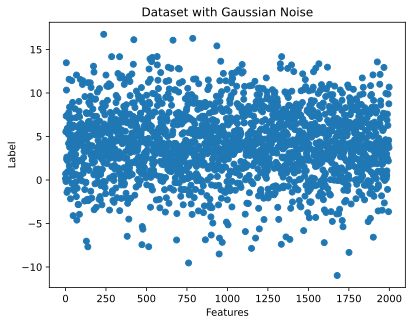

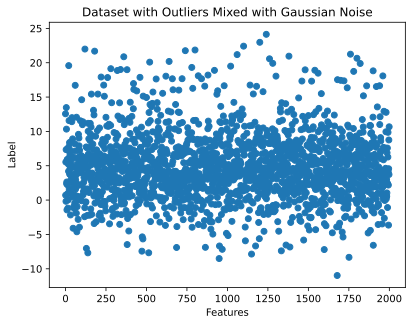

In [19]:
import matplotlib.pyplot as plt

a = plt.figure(1)
a = plt.scatter([x for x in range(len(data1.y))],data1.y)
a = plt.title('Dataset with Gaussian Noise')
a = plt.xlabel('Features')
a = plt.ylabel ('Label')


b = plt.figure(2)
b = plt.scatter([x for x in range(len(data2.y))], data2.y)
a = plt.title('Dataset with Outliers Mixed with Gaussian Noise')
a = plt.xlabel('Features')
a = plt.ylabel ('Label')

plt.show()

# Interpretation of Differences in the Plots:

Although both dataset show a positive correlation between two numerical variables, the dataset with outliers mixed with gaussian noise can be differented with the presence of several data points that fall far away from the main cluster of the data points.  




# [3.] Experiment with mean absolute value loss (MAE) function as an alternative to the MSE loss function in your implementation of the regression model. The MAE model should be more robust in situations where there are a lot of outliers. Compare the performance using the two loss functions on the two datasets. Plot the four comparisons in a notebook. Again, add a text cell that explains what was done, what the results are, and provides an interpretation of the results.

### MSE Loss Function for Dataset with Gaussian Noise

MSE error in estimating w: tensor([ 0.0015, -0.0117])
MSE error in estimating b: tensor([0.0121])


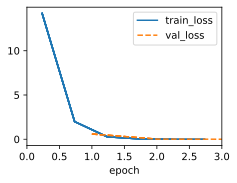

In [20]:
class LinearRegression(d2l.Module):
    """The linear regression model implemented with high-level APIs."""
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.LazyLinear(1) # specifies output to be 1-dimensional
        self.net.weight.data.normal_(0, 0.01) # initialize weights drawing random numbers from a normal distribution with mean 0 and standard deviation 0.01
        self.net.bias.data.fill_(0)

# compute mean squared error
@d2l.add_to_class(LinearRegression)
def loss(self, y_hat, y):
    fn = nn.MSELoss()
    return fn(y_hat, y)

# Implement Minibatch SDG
@d2l.add_to_class(LinearRegression)
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), self.lr) # specifies the parameters to optimize over and the learning rate

"""Train dataset with Purely Gaussian Noise"""
model = LinearRegression(lr=0.03) # specify learning rate
trainer = d2l.Trainer(max_epochs=3) # specify amount training
trainer.fit(model, data1) # train

@d2l.add_to_class(LinearRegression)
def get_w_b(self):
    return (self.net.weight.data, self.net.bias.data)
w, b = model.get_w_b() # access model parameters

# compute the difference between model parameters and actual parameter
print(f'MSE error in estimating w: {data1.w - w.reshape(data1.w.shape)}')
print(f'MSE error in estimating b: {data1.b - b}')

### MAE Loss Function for Dataset with Gaussian Noise

MAE error in estimating w: tensor([ 0.9826, -2.1396])
MAE error in estimating b: tensor([2.0517])


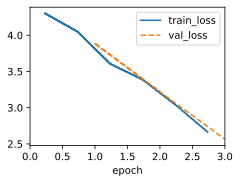

In [21]:
class LinearRegression(d2l.Module):
    """The linear regression model implemented with high-level APIs."""
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.LazyLinear(1) # specifies output to be 1-dimensional
        self.net.weight.data.normal_(0, 0.01) # initialize weights drawing random numbers from a normal distribution with mean 0 and standard deviation 0.01
        self.net.bias.data.fill_(0)

@d2l.add_to_class(LinearRegression)
def loss(self, y_hat, y):
    fn = nn.L1Loss()
    return fn(y_hat, y)

# Implement Minibatch SDG
@d2l.add_to_class(LinearRegression)
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), self.lr) # specifies the parameters to optimize over and the learning rate

"""Train dataset with Purely Gaussian Noise"""
model = LinearRegression(lr=0.03) # specify learning rate
trainer = d2l.Trainer(max_epochs=3) # specify amount training
trainer.fit(model, data1) # train

@d2l.add_to_class(LinearRegression)
def get_w_b(self):
    return (self.net.weight.data, self.net.bias.data)
w, b = model.get_w_b() # access model parameters

# compute the difference between model parameters and actual parameter
print(f'MAE error in estimating w: {data1.w - w.reshape(data1.w.shape)}')
print(f'MAE error in estimating b: {data1.b - b}')

### MSE Loss Function for Dataset with Outliers Mixed with Gaussian Noise

MSE error in estimating w: tensor([-0.0511, -0.0312])
MSE error in estimating b: tensor([-0.5808])


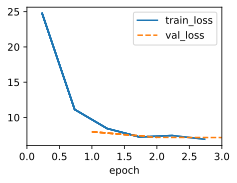

In [22]:
class LinearRegression(d2l.Module):
    """The linear regression model implemented with high-level APIs."""
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.LazyLinear(1) # specifies output to be 1-dimensional
        self.net.weight.data.normal_(0, 0.01) # initialize weights drawing random numbers from a normal distribution with mean 0 and standard deviation 0.01
        self.net.bias.data.fill_(0)

# compute mean squared error
@d2l.add_to_class(LinearRegression)
def loss(self, y_hat, y):
    fn = nn.MSELoss()
    return fn(y_hat, y)

# Implement Minibatch SDG
@d2l.add_to_class(LinearRegression)
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), self.lr) # specifies the parameters to optimize over and the learning rate

"""Train dataset with Outliers Mixed with Gaussian Noise"""
model = LinearRegression(lr=0.03) # specify learning rate
trainer = d2l.Trainer(max_epochs=3) # specify amount training
trainer.fit(model, data2) # train

@d2l.add_to_class(LinearRegression)
def get_w_b(self):
    return (self.net.weight.data, self.net.bias.data)
w, b = model.get_w_b() # access model parameters

# compute the difference between model parameters and actual parameter
print(f'MSE error in estimating w: {data2.w - w.reshape(data2.w.shape)}')
print(f'MSE error in estimating b: {data2.b - b}')

### MAE Loss Function for Dataset with Outliers Mixed with Gaussian Noise

MSE error in estimating w: tensor([ 1.4765, -2.3333])
MSE error in estimating b: tensor([2.0124])


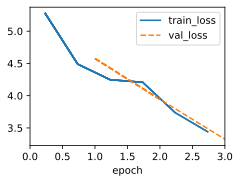

In [23]:
class LinearRegression(d2l.Module):
    """The linear regression model implemented with high-level APIs."""
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.LazyLinear(1) # specifies output to be 1-dimensional
        self.net.weight.data.normal_(0, 0.01) # initialize weights drawing random numbers from a normal distribution with mean 0 and standard deviation 0.01
        self.net.bias.data.fill_(0)

@d2l.add_to_class(LinearRegression)
def loss(self, y_hat, y):
    fn = nn.L1Loss()
    return fn(y_hat, y)

# Implement Minibatch SDG
@d2l.add_to_class(LinearRegression)
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), self.lr) # specifies the parameters to optimize over and the learning rate

"""Train dataset with Outliers Mixed with Gaussian Noise"""
model = LinearRegression(lr=0.03) # specify learning rate
trainer = d2l.Trainer(max_epochs=3) # specify amount training
trainer.fit(model, data2) # train

@d2l.add_to_class(LinearRegression)
def get_w_b(self):
    return (self.net.weight.data, self.net.bias.data)
w, b = model.get_w_b() # access model parameters

# compute the difference between model parameters and actual parameter
print(f'MSE error in estimating w: {data2.w - w.reshape(data2.w.shape)}')
print(f'MSE error in estimating b: {data2.b - b}')

# Interpretation

1. What was done:

> I implemented a linear regression model with MSE Loss function and MAE Loss function on two datasets. One of the datasets include gaussaian noise and the second dataset include outliers and gaussaian noise. I plotted the results and compare the performance of the model using the two loss functions on the two datasets.

2. The results and Interpretation of the results:

> The result for experimenting the MSE Loss function for Dataset with Gaussian Noise shows that both the training loss and val loss decreasing overtime and converging at about 1.5 epochs. This means that any for further training will not result in improve loss.

> The result for experimenting the MAE Loss function for Dataset with Gaussian Noise also show that both the training loss and validation loss are decresing overtime, whic suggests that the model is not overfittin the training data. However, to arrive at a convergence we would need to increase max_epoch.

> The result for experimenting the MSE Loss function for Dataset with Outliers mixed with Gaussian Noise also shows both the training loss and validation loss are decresing overtime and they converged at about 2.5 epoch. After which it seems the validation loss started to increase, which could indicate overfitting.

> The result for experimenting the MAE Loss function for Dataset with Outliers mixied with Gaussian Noise also shows both the training loss and validation loss are decresing overtime. This means that the model is learning well and generalizing well to new instants as well.

> In this experiment, the best and lowest losses are seen when we implemented the MSE Loss function for Dataset with Gaussian Noise. Overall, the specific values for the loss will vary depending on the nature of the dataset and loss function used.